In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from geoip import geolite2
from geopy.geocoders import Nominatim
from googletrans import Translator

In [49]:
with open("logins.txt","r") as file: #read 1st log
    data=file.read()
with open("IP_logins.txt","r") as file2:#read 2nd log
    data2=file2.read()

In [50]:
df=pd.DataFrame([z.split(',') for z in data.split('\n')]) #generate the dataframe
df2=df.drop(columns=[3,4,5,6,7])
df3=df2.drop([len(df2)-1])
df3 = df3.rename(columns={0:"time", 1:"user", 2:"pass"}) #add column names

In [51]:
pd.set_option('display.max_rows',20) #pandas will show 100 results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3E5006400>],
      dtype=object)

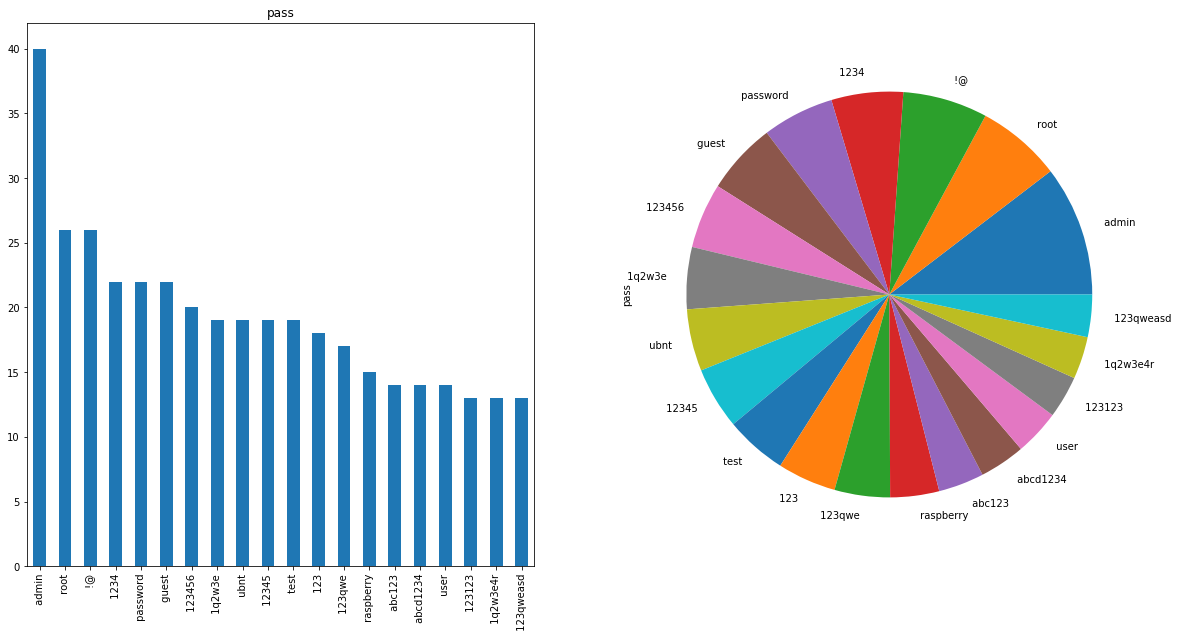

In [52]:
df3['pass'].value_counts().head(20) #plot the passwords
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
df3['pass'].value_counts().head(20).plot(kind="bar",ax=ax1,subplots=True)
df3['pass'].value_counts().head(20).plot.pie(ax=ax2,subplots=True)

In [53]:
print("Top 20 User-ID:")
print(" User        Count\n")
print(df3['user'].value_counts().head(20)) #top 20 user names


Top 20 User-ID:
 User        Count

 root                                                         13858
 admin                                                           39
 pi                                                              18
 ubnt                                                            15
 guest                                                           13
 test                                                            10
 user                                                             8
 support                                                          8
 140.238.244.119 - SSH-2.0-Ope.SSH_7.2p2 Ubuntu-4ubuntu2.8        6
 fake                                                             6
 140.238.244.253 - SSH-2.0-Ope.SSH_7.6p1 Ubuntu-4ubuntu0.3        6
 butter                                                           3
 oracle                                                           3
 ubuntu                                                           3
 osmc       

In [54]:
print("Top 20 Password:")
print(" Password   Count\n")
print(df3['pass'].value_counts().head(20)) #top 20 user names


Top 20 Password:
 Password   Count

 admin        40
 root         26
 !@           26
 1234         22
 password     22
 guest        22
 123456       20
 1q2w3e       19
 ubnt         19
 12345        19
 test         19
 123          18
 123qwe       17
 raspberry    15
 abc123       14
 abcd1234     14
 user         14
 123123       13
 1q2w3e4r     13
 123qweasd    13
Name: pass, dtype: int64


In [55]:
df4=pd.DataFrame([z.split(',') for z in data2.split('\n')])
df4=df4.rename(columns={0:"Time",1:"IP", 2:"latitude",3:"longitude"}) #add column headers

--------------
Top 20 IP: 

IP Address         Count

218.92.0.201       2329
218.92.0.202        920
173.212.196.150     605
218.92.0.211        331
218.92.0.204        297
218.92.0.206        293
218.92.0.205        257
62.210.103.181      251
188.166.45.125      145
122.224.177.6       127
104.200.134.160      28
76.164.201.206       23
27.69.242.187        22
107.189.10.141       18
195.231.0.88         16
188.166.4.149        14
107.189.10.174       12
202.75.216.136       11
188.166.62.177       10
190.22.182.53         8
Name: IP, dtype: int64


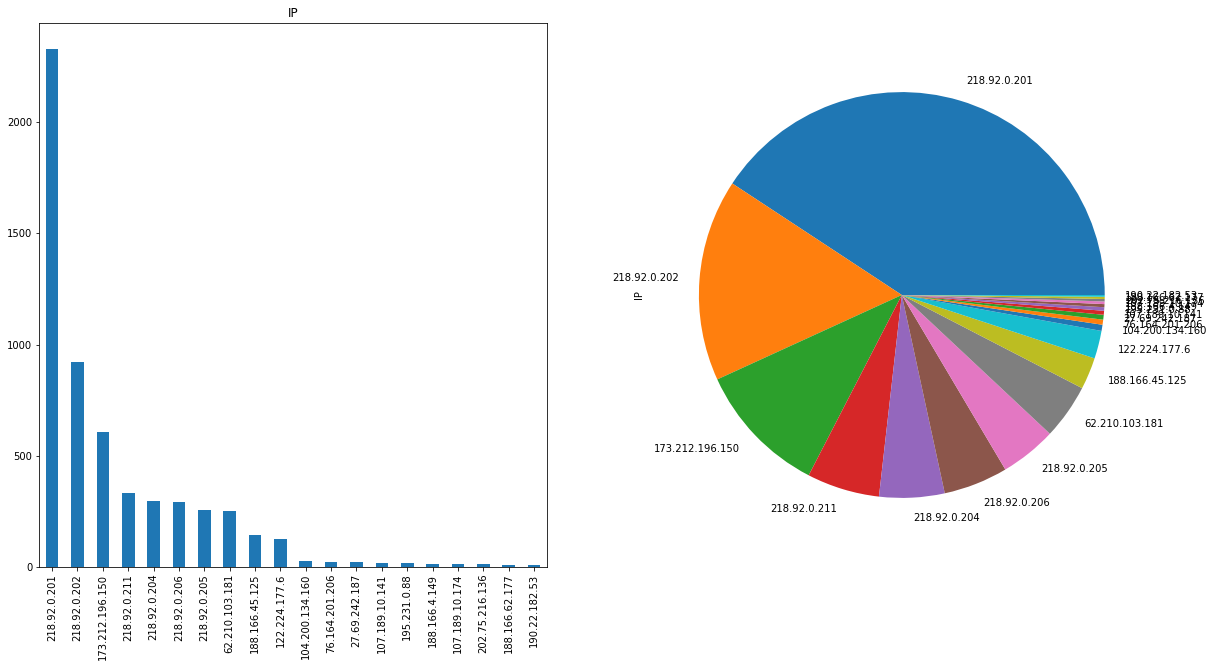

In [56]:
p=df4['IP'].value_counts().head(20)  #print top 20 IP
print("--------------")
fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
df4['IP'].value_counts().head(20).plot(kind="bar",ax=ax1,subplots=True)
df4['IP'].value_counts().head(20).plot.pie(ax=ax2,subplots=True)
print("Top 20 IP: \n")
print("IP Address         Count\n")
print(p)

In [58]:
#df4['latitude'].value_counts().head(10).plot(kind="bar",ax=ax1,subplots=True)
geolocator = Nominatim(user_agent="traffic analysis")
#location = geolocator.reverse("52.509669, 13.376294")
location=[]
lst=p.index.tolist()
#print(lst)
for i in range(len(lst)):
    lat=(((df4.where(df4['IP']==lst[i]).dropna().head(1))['latitude']).to_string()).split(" ")[4]
    #print(lat)
    long=(((df4.where(df4['IP']==lst[i]).dropna().head(1))['longitude']).to_string()).split(" ")[4]
    if lat=="None":
        location.append("Unknown location "+str(i))
    else:
        location.append((geolocator.reverse(lat+" , "+long)))
print("location fetched")

location fetched


In [59]:
country=[]
val=p.tolist()
#print(val)
translator = Translator()
for i in range(len(location)):
    if str(location[i]).split(" ")[0]=="Unknown":
        country.append("Unknown_"+str(i))
    else:
        
        x=location[i].address.split(",")
        c=str(x[len(x)-1])
        t=translator.translate(c)
        country.append(t.text)
#print(country)
#for i in range(len(location)):
  #  print(country[i])
   # print(val[i])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

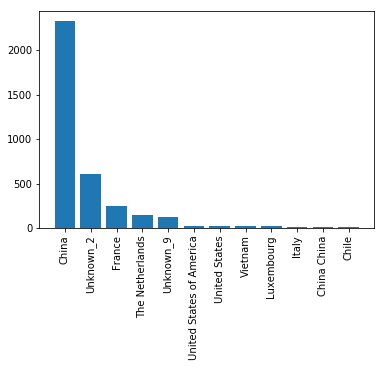

In [60]:
plt.bar(country,val)
plt.xticks(rotation='vertical')

In [61]:
print("Unique  Users: ",len(df3['user'].unique())) #unique user count
print("Unique Passwords: ",len(df3['pass'].unique())) #unique password count

Unique  Users:  537
Unique Passwords:  5703
